In [112]:
import numpy as np
import pyuvdata
import matplotlib.pyplot as plt

In [134]:
cal_vanilla = pyuvdata.UVCal()
cal_vanilla.read_calfits('/Users/ruby/Astro/dwcal_tests_Jan2022/excluded_sources_vanilla_cal.calfits')
cal_dw = pyuvdata.UVCal()
cal_dw.read_calfits('/Users/ruby/Astro/dwcal_tests_Jan2022/excluded_sources_wedge_excluded.calfits')

telescope_location is not set. Using known values for mwa.


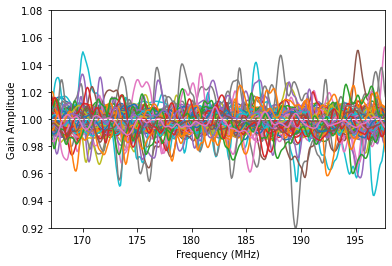

In [186]:
for ant_ind in range(cal_vanilla.Nants_data):
    plt.plot(np.squeeze(cal_vanilla.freq_array)/1e6, np.abs(cal_vanilla.gain_array[ant_ind,0,:,0,0]))
    plt.xlim([np.min(cal_vanilla.freq_array)/1e6, np.max(cal_vanilla.freq_array)/1e6])
    plt.ylim([1-.08,1+.08])
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Gain Amplitude')
plt.plot([np.min(cal_vanilla.freq_array)/1e6, np.max(cal_vanilla.freq_array)/1e6], [1,1], color='white', linestyle='--', linewidth=0.9)
plt.show()

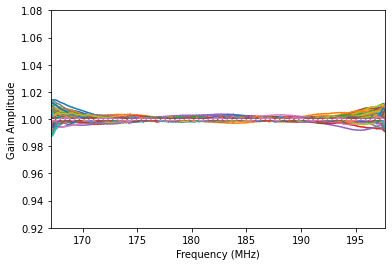

In [187]:
for ant_ind in range(cal_dw.Nants_data):
    plt.plot(np.squeeze(cal_dw.freq_array)/1e6, np.abs(cal_dw.gain_array[ant_ind,0,:,0,0]))
    plt.xlim([np.min(cal_dw.freq_array)/1e6, np.max(cal_dw.freq_array)/1e6])
    plt.ylim([1-.08,1+.08])
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Gain Amplitude')
plt.plot([np.min(cal_dw.freq_array)/1e6, np.max(cal_dw.freq_array)/1e6], [1,1], color='white', linestyle='--', linewidth=0.9)
plt.show()

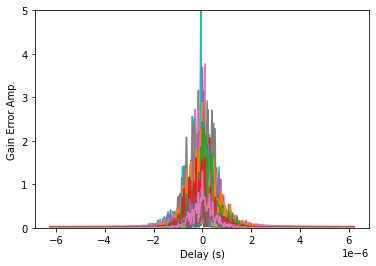

In [203]:
delay_array = np.fft.fftfreq(cal_vanilla.Nfreqs, d=cal_vanilla.channel_width)
delay_array = np.fft.fftshift(delay_array)
for ant_ind in range(cal_vanilla.Nants_data):
    gains_fft = np.fft.fftshift(np.fft.fft(cal_vanilla.gain_array[ant_ind,0,:,0,0]-1))
    plt.plot(delay_array, np.abs(gains_fft))
plt.ylim([0,5])
plt.xlabel('Delay (s)')
plt.ylabel('Gain Error Amp.')
plt.show()

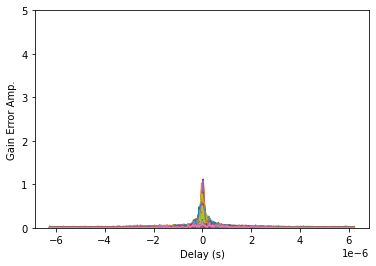

In [204]:
delay_array = np.fft.fftfreq(cal_dw.Nfreqs, d=cal_dw.channel_width)
delay_array = np.fft.fftshift(delay_array)
for ant_ind in range(cal_vanilla.Nants_data):
    gains_fft = np.fft.fftshift(np.fft.fft(cal_dw.gain_array[ant_ind,0,:,0,0]-1))
    plt.plot(delay_array, np.abs(gains_fft))
plt.ylim([0,5])
plt.xlabel('Delay (s)')
plt.ylabel('Gain Error Amp.')
plt.show()

In [308]:
delay_array = np.fft.fftfreq(cal_dw.Nfreqs, d=cal_dw.channel_width)
test_weighting = np.full((cal_dw.Nfreqs), 0.01)
for delay_ind, delay_val in enumerate(delay_array):
    if np.abs(delay_val) > 1.2*150/(3.0 * 10 ** 8):
        test_weighting[delay_ind] = 1.
freq_weighting = np.fft.fft(test_weighting)

In [311]:
a = [1,2,3]
a[0:2]

[1, 2]

In [205]:
cal_vanilla_random_gains = pyuvdata.UVCal()
cal_vanilla_random_gains.read_calfits('/Users/ruby/Astro/dwcal_tests_Jan2022/data_with_randomized_gains_vanilla_cal.calfits')
cal_dw_random_gains = pyuvdata.UVCal()
cal_dw_random_gains.read_calfits('/Users/ruby/Astro/dwcal_tests_Jan2022/data_with_randomized_gains_wedge_excluded.calfits')
random_gains = pyuvdata.UVCal()
random_gains.read_calfits('/Users/ruby/Astro/dwcal_tests_Jan2022/true_gains.calfits')

telescope_location is not set. Using known values for mwa.


In [266]:
cal_vanilla_random_gains_diff = cal_vanilla_random_gains.copy()
for ant_ind, ant_val in enumerate(random_gains.ant_array):
    cal_vanilla_random_gains_diff.gain_array[
        np.where(cal_vanilla_random_gains_diff.ant_array==ant_val)[0], :, :, :, :
    ] -= 1./random_gains.gain_array[ant_ind, :, :, :, :]
    
cal_dw_random_gains_diff = cal_dw_random_gains.copy()
for ant_ind, ant_val in enumerate(random_gains.ant_array):
    cal_dw_random_gains_diff.gain_array[
        np.where(cal_dw_random_gains_diff.ant_array==ant_val)[0], :, :, :, :
    ] -= 1./random_gains.gain_array[ant_ind, :, : ,: ,:]

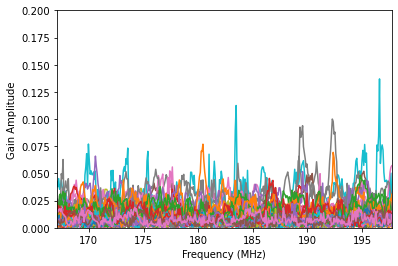

In [267]:
for ant_ind in range(cal_vanilla_random_gains_diff.Nants_data):
    plt.plot(np.squeeze(cal_vanilla_random_gains_diff.freq_array)/1e6, np.abs(cal_vanilla_random_gains_diff.gain_array[ant_ind,0,:,0,0]))
    plt.xlim([np.min(cal_vanilla_random_gains_diff.freq_array)/1e6, np.max(cal_vanilla_random_gains_diff.freq_array)/1e6])
    plt.ylim([0,0+.2])
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Gain Amplitude')
plt.plot([np.min(cal_vanilla_random_gains_diff.freq_array)/1e6, np.max(cal_vanilla_random_gains_diff.freq_array)/1e6], [1,1], color='white', linestyle='--', linewidth=0.9)
plt.show()

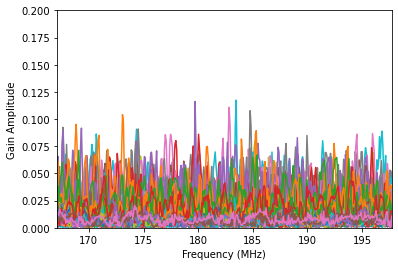

In [268]:
for ant_ind in range(cal_dw_random_gains_diff.Nants_data):
    plt.plot(np.squeeze(cal_dw_random_gains_diff.freq_array)/1e6, np.abs(cal_dw_random_gains_diff.gain_array[ant_ind,0,:,0,0]))
    plt.xlim([np.min(cal_dw_random_gains_diff.freq_array)/1e6, np.max(cal_dw_random_gains_diff.freq_array)/1e6])
    plt.ylim([0,0+.2])
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Gain Amplitude')
plt.plot([np.min(cal_dw_random_gains_diff.freq_array)/1e6, np.max(cal_dw_random_gains_diff.freq_array)/1e6], [1,1], color='white', linestyle='--', linewidth=0.9)
plt.show()

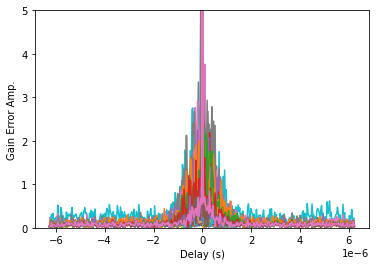

In [269]:
delay_array = np.fft.fftfreq(cal_vanilla_random_gains_diff.Nfreqs, d=cal_vanilla_random_gains_diff.channel_width)
delay_array = np.fft.fftshift(delay_array)
for ant_ind in range(cal_vanilla_random_gains_diff.Nants_data):
    gains_fft = np.fft.fftshift(np.fft.fft(cal_vanilla_random_gains_diff.gain_array[ant_ind,0,:,0,0]-1))
    plt.plot(delay_array, np.abs(gains_fft))
plt.ylim([0,5])
plt.xlabel('Delay (s)')
plt.ylabel('Gain Error Amp.')
plt.show()

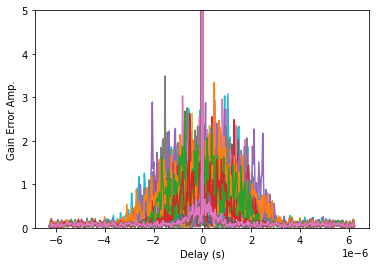

In [270]:
delay_array = np.fft.fftfreq(cal_dw_random_gains_diff.Nfreqs, d=cal_dw_random_gains_diff.channel_width)
delay_array = np.fft.fftshift(delay_array)
for ant_ind in range(cal_vanilla_random_gains_diff.Nants_data):
    gains_fft = np.fft.fftshift(np.fft.fft(cal_dw_random_gains_diff.gain_array[ant_ind,0,:,0,0]-1))
    plt.plot(delay_array, np.abs(gains_fft))
plt.ylim([0,5])
plt.xlabel('Delay (s)')
plt.ylabel('Gain Error Amp.')
plt.show()

In [6]:
Nfreqs = 384
delay_step = 0.1
Nbls = 1000
delay_array = np.arange(
    -(Nfreqs - 1) * delay_step, Nfreqs * delay_step, delay_step, dtype=float
)

In [7]:
print(delay_array)

[-3.83000000e+01 -3.82000000e+01 -3.81000000e+01 -3.80000000e+01
 -3.79000000e+01 -3.78000000e+01 -3.77000000e+01 -3.76000000e+01
 -3.75000000e+01 -3.74000000e+01 -3.73000000e+01 -3.72000000e+01
 -3.71000000e+01 -3.70000000e+01 -3.69000000e+01 -3.68000000e+01
 -3.67000000e+01 -3.66000000e+01 -3.65000000e+01 -3.64000000e+01
 -3.63000000e+01 -3.62000000e+01 -3.61000000e+01 -3.60000000e+01
 -3.59000000e+01 -3.58000000e+01 -3.57000000e+01 -3.56000000e+01
 -3.55000000e+01 -3.54000000e+01 -3.53000000e+01 -3.52000000e+01
 -3.51000000e+01 -3.50000000e+01 -3.49000000e+01 -3.48000000e+01
 -3.47000000e+01 -3.46000000e+01 -3.45000000e+01 -3.44000000e+01
 -3.43000000e+01 -3.42000000e+01 -3.41000000e+01 -3.40000000e+01
 -3.39000000e+01 -3.38000000e+01 -3.37000000e+01 -3.36000000e+01
 -3.35000000e+01 -3.34000000e+01 -3.33000000e+01 -3.32000000e+01
 -3.31000000e+01 -3.30000000e+01 -3.29000000e+01 -3.28000000e+01
 -3.27000000e+01 -3.26000000e+01 -3.25000000e+01 -3.24000000e+01
 -3.23000000e+01 -3.22000

In [8]:
delay_weighting = np.zeros((Nbls, 2 * Nfreqs - 1))

In [9]:
np.where(np.abs(delay_array)<1e-10)

(array([383]),)

In [10]:
delay_weighting[:,383] = 1

In [11]:
# Shift delay zero point to the start
delay_weighting = np.fft.ifftshift(delay_weighting, axes=1)
# Fourier transform
freq_weighting = np.fft.fft(delay_weighting, axis=1)
# Result is symmetric and real, so keep half the values and real part only
freq_weighting = np.real(freq_weighting[:, 0:Nfreqs])

In [12]:
np.shape(freq_weighting)

(1000, 384)

In [13]:
print(freq_weighting[0,:])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [14]:
print(np.min(freq_weighting))
print(np.max(freq_weighting))

1.0
1.0


In [161]:
model_path="/Users/ruby/Astro/dwcal_tests_Jan2022/fhd_rlb_model_GLEAM_bright_sources_Dec2021"
obsid="1061316296"
pol="XX"
model_filelist = [
    "{}/{}".format(model_path, file)
    for file in [
        "vis_data/{}_vis_{}.sav".format(obsid, pol),
        "vis_data/{}_vis_model_{}.sav".format(obsid, pol),
        "vis_data/{}_flags.sav".format(obsid),
        "metadata/{}_params.sav".format(obsid),
        "metadata/{}_settings.txt".format(obsid),
        "metadata/{}_layout.sav".format(obsid),
    ]
]
model = pyuvdata.UVData()
model.read_fhd(model_filelist, use_model=True)


Telescope location derived from obs lat/lon/alt values does not match the location in the layout file. Using the value from known_telescopes.


In [111]:
print(np.shape(model.time_array))
times = list(set(model.time_array))
print(len(times))

(455168,)
56


In [163]:
model.integration_time

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

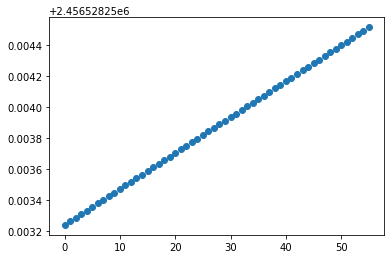

In [110]:
plt.plot(np.sort(times), 'o')

In [167]:
(times[1]-times[0])*24*60*60

2.000713348388672

In [15]:
# Average across time
model.downsample_in_time(n_times_to_avg=model.Ntimes)
# Remove autocorrelations
bl_lengths = np.sqrt(np.sum(model.uvw_array ** 2.0, axis=1))
non_autos = np.where(bl_lengths > 0.01)[0]
model.select(blt_inds=non_autos)

Telescope location derived from obs lat/lon/alt values does not match the location in the layout file. Using the value from known_telescopes.


True


There is a gap in the times of baseline (0, 0). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 1). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 2). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 3). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 4). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 5). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 6). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 7). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 8). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 9). The output may include av

There is a gap in the times of baseline (5, 123). The output may include averages across long time gaps.
There is a gap in the times of baseline (5, 124). The output may include averages across long time gaps.
There is a gap in the times of baseline (5, 125). The output may include averages across long time gaps.
There is a gap in the times of baseline (5, 126). The output may include averages across long time gaps.
There is a gap in the times of baseline (5, 127). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 6). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 7). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 8). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 9). The output may include averages across long time gaps.
There is a gap in the times of baseline (6, 10). The output may

There is a gap in the times of baseline (11, 110). The output may include averages across long time gaps.
There is a gap in the times of baseline (11, 111). The output may include averages across long time gaps.
There is a gap in the times of baseline (11, 112). The output may include averages across long time gaps.
There is a gap in the times of baseline (11, 113). The output may include averages across long time gaps.
There is a gap in the times of baseline (11, 114). The output may include averages across long time gaps.
There is a gap in the times of baseline (11, 115). The output may include averages across long time gaps.
There is a gap in the times of baseline (11, 116). The output may include averages across long time gaps.
There is a gap in the times of baseline (11, 117). The output may include averages across long time gaps.
There is a gap in the times of baseline (11, 118). The output may include averages across long time gaps.
There is a gap in the times of baseline (11, 1

There is a gap in the times of baseline (18, 40). The output may include averages across long time gaps.
There is a gap in the times of baseline (18, 41). The output may include averages across long time gaps.
There is a gap in the times of baseline (18, 42). The output may include averages across long time gaps.
There is a gap in the times of baseline (18, 43). The output may include averages across long time gaps.
There is a gap in the times of baseline (18, 44). The output may include averages across long time gaps.
There is a gap in the times of baseline (18, 45). The output may include averages across long time gaps.
There is a gap in the times of baseline (18, 46). The output may include averages across long time gaps.
There is a gap in the times of baseline (18, 47). The output may include averages across long time gaps.
There is a gap in the times of baseline (18, 48). The output may include averages across long time gaps.
There is a gap in the times of baseline (18, 49). The o

There is a gap in the times of baseline (25, 56). The output may include averages across long time gaps.
There is a gap in the times of baseline (25, 57). The output may include averages across long time gaps.
There is a gap in the times of baseline (25, 58). The output may include averages across long time gaps.
There is a gap in the times of baseline (25, 59). The output may include averages across long time gaps.
There is a gap in the times of baseline (25, 60). The output may include averages across long time gaps.
There is a gap in the times of baseline (25, 61). The output may include averages across long time gaps.
There is a gap in the times of baseline (25, 62). The output may include averages across long time gaps.
There is a gap in the times of baseline (25, 63). The output may include averages across long time gaps.
There is a gap in the times of baseline (25, 64). The output may include averages across long time gaps.
There is a gap in the times of baseline (25, 65). The o

There is a gap in the times of baseline (32, 123). The output may include averages across long time gaps.
There is a gap in the times of baseline (32, 124). The output may include averages across long time gaps.
There is a gap in the times of baseline (32, 125). The output may include averages across long time gaps.
There is a gap in the times of baseline (32, 126). The output may include averages across long time gaps.
There is a gap in the times of baseline (32, 127). The output may include averages across long time gaps.
There is a gap in the times of baseline (33, 33). The output may include averages across long time gaps.
There is a gap in the times of baseline (33, 34). The output may include averages across long time gaps.
There is a gap in the times of baseline (33, 35). The output may include averages across long time gaps.
There is a gap in the times of baseline (33, 36). The output may include averages across long time gaps.
There is a gap in the times of baseline (33, 37). 

There is a gap in the times of baseline (41, 61). The output may include averages across long time gaps.
There is a gap in the times of baseline (41, 62). The output may include averages across long time gaps.
There is a gap in the times of baseline (41, 63). The output may include averages across long time gaps.
There is a gap in the times of baseline (41, 64). The output may include averages across long time gaps.
There is a gap in the times of baseline (41, 65). The output may include averages across long time gaps.
There is a gap in the times of baseline (41, 66). The output may include averages across long time gaps.
There is a gap in the times of baseline (41, 67). The output may include averages across long time gaps.
There is a gap in the times of baseline (41, 68). The output may include averages across long time gaps.
There is a gap in the times of baseline (41, 69). The output may include averages across long time gaps.
There is a gap in the times of baseline (41, 70). The o

There is a gap in the times of baseline (50, 85). The output may include averages across long time gaps.
There is a gap in the times of baseline (50, 86). The output may include averages across long time gaps.
There is a gap in the times of baseline (50, 87). The output may include averages across long time gaps.
There is a gap in the times of baseline (50, 88). The output may include averages across long time gaps.
There is a gap in the times of baseline (50, 89). The output may include averages across long time gaps.
There is a gap in the times of baseline (50, 90). The output may include averages across long time gaps.
There is a gap in the times of baseline (50, 91). The output may include averages across long time gaps.
There is a gap in the times of baseline (50, 92). The output may include averages across long time gaps.
There is a gap in the times of baseline (50, 93). The output may include averages across long time gaps.
There is a gap in the times of baseline (50, 94). The o

There is a gap in the times of baseline (60, 111). The output may include averages across long time gaps.
There is a gap in the times of baseline (60, 112). The output may include averages across long time gaps.
There is a gap in the times of baseline (60, 113). The output may include averages across long time gaps.
There is a gap in the times of baseline (60, 114). The output may include averages across long time gaps.
There is a gap in the times of baseline (60, 115). The output may include averages across long time gaps.
There is a gap in the times of baseline (60, 116). The output may include averages across long time gaps.
There is a gap in the times of baseline (60, 117). The output may include averages across long time gaps.
There is a gap in the times of baseline (60, 118). The output may include averages across long time gaps.
There is a gap in the times of baseline (60, 119). The output may include averages across long time gaps.
There is a gap in the times of baseline (60, 1

There is a gap in the times of baseline (72, 114). The output may include averages across long time gaps.
There is a gap in the times of baseline (72, 115). The output may include averages across long time gaps.
There is a gap in the times of baseline (72, 116). The output may include averages across long time gaps.
There is a gap in the times of baseline (72, 117). The output may include averages across long time gaps.
There is a gap in the times of baseline (72, 118). The output may include averages across long time gaps.
There is a gap in the times of baseline (72, 119). The output may include averages across long time gaps.
There is a gap in the times of baseline (72, 120). The output may include averages across long time gaps.
There is a gap in the times of baseline (72, 121). The output may include averages across long time gaps.
There is a gap in the times of baseline (72, 122). The output may include averages across long time gaps.
There is a gap in the times of baseline (72, 1

There is a gap in the times of baseline (89, 122). The output may include averages across long time gaps.
There is a gap in the times of baseline (89, 123). The output may include averages across long time gaps.
There is a gap in the times of baseline (89, 124). The output may include averages across long time gaps.
There is a gap in the times of baseline (89, 125). The output may include averages across long time gaps.
There is a gap in the times of baseline (89, 126). The output may include averages across long time gaps.
There is a gap in the times of baseline (89, 127). The output may include averages across long time gaps.
There is a gap in the times of baseline (90, 90). The output may include averages across long time gaps.
There is a gap in the times of baseline (90, 91). The output may include averages across long time gaps.
There is a gap in the times of baseline (90, 92). The output may include averages across long time gaps.
There is a gap in the times of baseline (90, 93).

In [16]:
print(np.shape(model.flag_array))
print(np.shape(model.data_array))
flagged_bls = np.max(model.flag_array, axis=0)
flagged_freqs = np.squeeze(np.max(model.flag_array, axis=2))
np.shape(flagged_freqs)
print(np.shape(np.where(flagged_freqs)))

(8001, 1, 384, 1)
(8001, 1, 384, 1)
(1, 2374)


In [17]:
model.antenna_numbers

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127], dtype=int32)

In [18]:
model.select(antenna_nums=[3, 4, 57, 70, 92, 110])

In [19]:
np.shape(model.data_array)

(15, 1, 384, 1)

In [20]:
bl_lengths = np.sqrt(np.sum(model.uvw_array ** 2.0, axis=1))

In [21]:
print(bl_lengths)

[ 12.94269909 104.45735702 306.15347806 574.18998275 641.31037914
 110.01301273 318.69110761 585.90524566 644.88466613 257.32715778
 501.90557872 726.73620223 279.32537684 706.73943836 931.79484561]


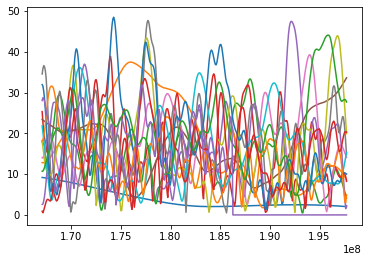

In [22]:
for bl_ind in range(model.Nbls):
    plt.plot(model.freq_array[0,:], np.abs(model.data_array[bl_ind, 0, :, 0]))

In [68]:
print(np.shape(model.flag_array))
print(np.shape(np.max(model.flag_array, axis=(1,2,3))))
print(np.where(np.invert(np.max(model.flag_array, axis=(1,2,3))))[0])

(15, 1, 384, 1)
(15,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [24]:
test = np.max(np.stack([
    np.squeeze(model.flag_array, axis=(1, 3)),
    np.squeeze(model.flag_array, axis=(1, 3))
]), axis=0)

In [25]:
np.shape(test)

(15, 384)

In [92]:
cal_vanilla_limited_ants = pyuvdata.UVCal()
cal_vanilla_limited_ants.read_calfits('/Users/ruby/Astro/dwcal_tests_Jan2022/vanilla_limited_antennas.calfits')
cal_dw_limited_ants = pyuvdata.UVCal()
cal_dw_limited_ants.read_calfits('/Users/ruby/Astro/dwcal_tests_Jan2022/wedge_excluded_limited_antennas.calfits')
cal_freq_avg_limited_ants = pyuvdata.UVCal()
cal_freq_avg_limited_ants.read_calfits('/Users/ruby/Astro/dwcal_tests_Jan2022/freq_averaging_limited_antennas.calfits')

telescope_location is not set. Using known values for mwa.


In [93]:
np.shape(cal_vanilla_limited_ants.gain_array)

(6, 1, 384, 1, 1)

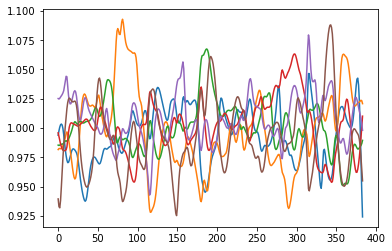

In [94]:
for ant_ind in range(6):
    plt.plot(np.abs(cal_vanilla_limited_ants.gain_array[ant_ind,0,:,0,0]))
plt.show()

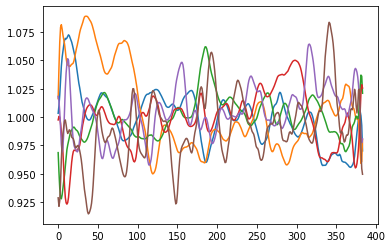

In [95]:
for ant_ind in range(6):
    plt.plot(np.abs(cal_dw_limited_ants.gain_array[ant_ind,0,:,0,0]))
plt.show()

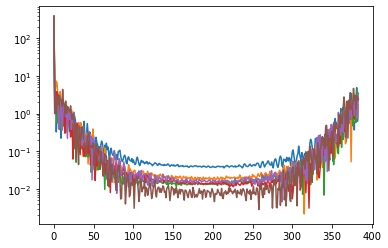

In [98]:
for ant_ind in range(6):
    plt.plot(np.abs(np.fft.fft(cal_vanilla_limited_ants.gain_array[ant_ind,0,:,0,0])))
    plt.yscale('log')
plt.show()

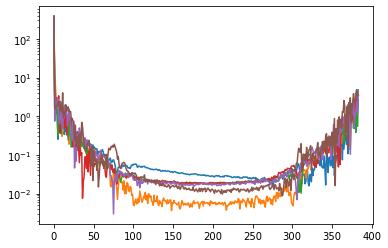

In [99]:
for ant_ind in range(6):
    plt.plot(np.abs(np.fft.fft(cal_dw_limited_ants.gain_array[ant_ind,0,:,0,0])))
    plt.yscale('log')
plt.show()

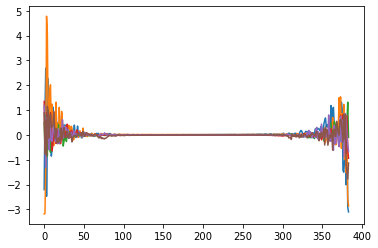

In [102]:
for ant_ind in range(6):
    plt.plot(np.abs(np.fft.fft(cal_vanilla_limited_ants.gain_array[ant_ind,0,:,0,0]))-np.abs(np.fft.fft(cal_dw_limited_ants.gain_array[ant_ind,0,:,0,0])))
plt.show()

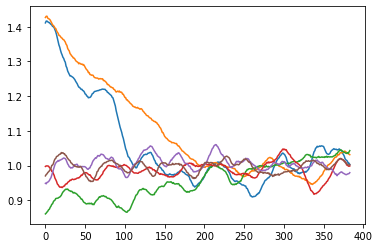

In [41]:
for ant_ind in range(6):
    plt.plot(np.abs(cal_freq_avg_limited_ants.gain_array[ant_ind,0,:,0,0]))
plt.show()

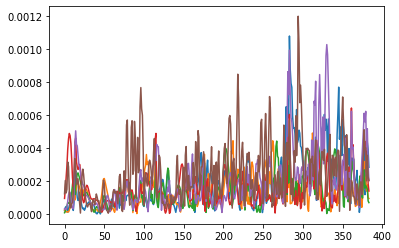

In [42]:
for ant_ind in range(6):
    plt.plot(np.abs(cal_dw_limited_ants.gain_array[ant_ind,0,:,0,0]-cal_vanilla_limited_ants.gain_array[ant_ind,0,:,0,0]))
plt.show()

In [170]:
import sys
sys.path.append('/Users/ruby/Astro/rlb_LWA/dwcal')
import delay_weighted_cal as dwcal

In [171]:
np.shape(model.data_array)

(455168, 1, 384, 1)

In [173]:
model.Nants_data

127

In [181]:
antenna_list = np.sort(np.unique(
    [model.ant_1_array, model.ant_2_array]
))

gain_stddev = 0.05
gains = np.random.normal(
    1.0, gain_stddev, size=(model.Nants_data, model.Nfreqs),
) + 1.0j * np.random.normal(0.0, gain_stddev, size=(model.Nants_data, model.Nfreqs),)

cal_obj = dwcal.initialize_cal(model, antenna_list, gains=gains)

In [179]:
model.Nfreqs

384

In [281]:
from pyuvdata import utils
antenna_list = np.unique(
    [model.ant_1_array, model.ant_2_array]
)
gains = np.ones((model.Nants_data, model.Nfreqs), dtype='complex')
gains[0,:] = 1.5
cal = dwcal.initialize_cal(model, antenna_list, gains=gains)
cal_test = utils.uvcalibrate(model, cal, inplace=False)

UVData object does not have `x_orientation` specified but UVCal does. Matching based on `x` and `y` only 


In [287]:
test_ratio = cal_test.data_array/model.data_array
print(np.unique(np.round(test_ratio[~np.isnan(test_ratio)], decimals=3)))
print(np.nanmin(test_ratio))
print(np.nanmax(test_ratio))

invalid value encountered in true_divide


[1.  +0.j 1.5 +0.j 2.25+0.j]
(0.9999999999999999-8.793444945671212e-17j)
(2.25+0j)


2.25

In [293]:
a = np.zeros((5,4))
a[2,3]=1
print(a)
a = a.flatten()
print(a)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
